# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [3]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

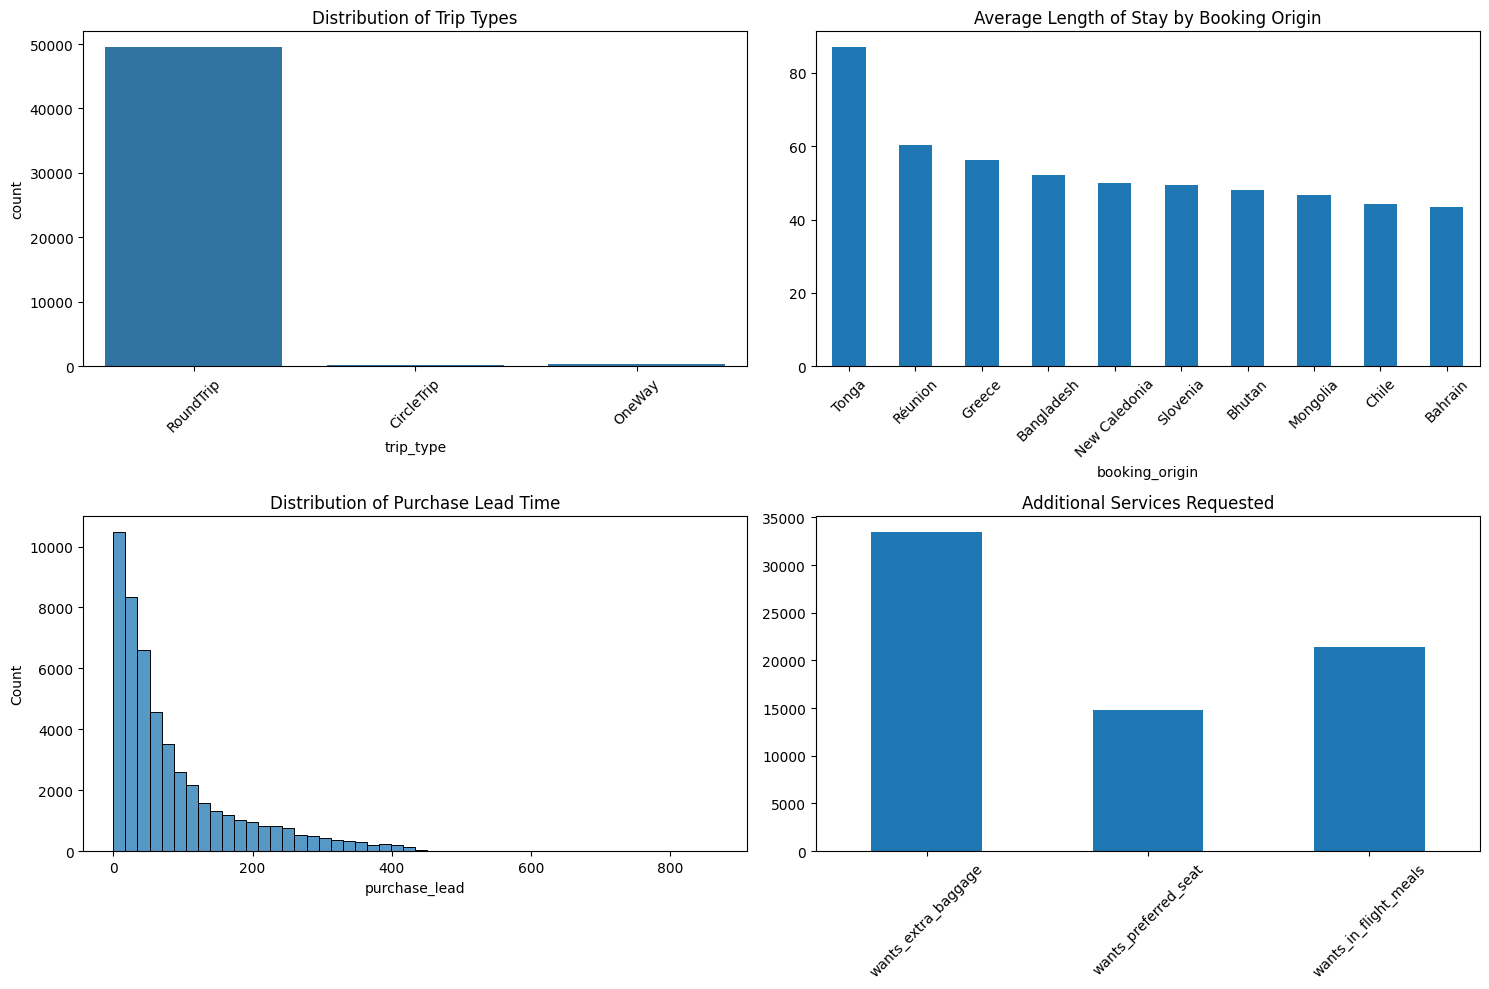

Key Insights:
Average number of passengers per booking: 1.59
Most common route: AKLKUL
Average purchase lead time (days): 84.94
Booking completion rate: 14.96 %


In [9]:
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of trip types
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='trip_type')
plt.title('Distribution of Trip Types')
plt.xticks(rotation=45)

# Plot 2: Average length of stay by booking origin
plt.subplot(2, 2, 2)
df.groupby('booking_origin')['length_of_stay'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Length of Stay by Booking Origin')
plt.xticks(rotation=45)

# Plot 3: Purchase lead time distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='purchase_lead', bins=50)
plt.title('Distribution of Purchase Lead Time')

# Plot 4: Extra services distribution
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
service_counts = df[services].sum()
plt.subplot(2, 2, 4)
service_counts.plot(kind='bar')
plt.title('Additional Services Requested')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print some key statistics
print("\
Key Insights:")
print("Average number of passengers per booking:", round(df['num_passengers'].mean(), 2))
print("Most common route:", df['route'].mode()[0])
print("Average purchase lead time (days):", round(df['purchase_lead'].mean(), 2))
print("Booking completion rate:", round(df['booking_complete'].mean() * 100, 2), "%")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '4.75'),
  Text(1, 0, '8.83'),
  Text(2, 0, '8.58'),
  Text(3, 0, '5.62'),
  Text(4, 0, '8.15'),
  Text(5, 0, '9.5'),
  Text(6, 0, '4.83'),
  Text(7, 0, '5.52'),
  Text(8, 0, '5.13'),
  Text(9, 0, '5.07')])

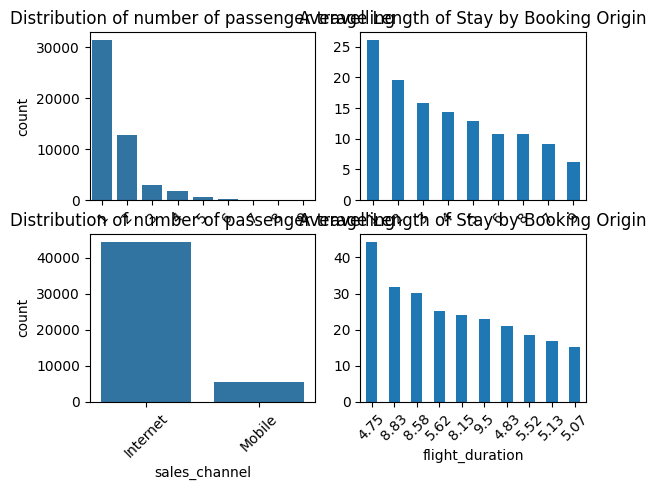

In [25]:
#EDA and corealtion and oullier removing

# Plot 1: Distribution of trip types
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='num_passengers')
plt.title('Distribution of number of passenger travelling')
plt.xticks(rotation=45)

# Plot 2: number of passenger travelling
plt.subplot(2, 2, 2)
df.groupby('num_passengers')['length_of_stay'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Length of Stay by Booking Origin')
plt.xticks(rotation=45)

# Plot 3: Distribution of trip types
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='sales_channel')
plt.title('Distribution of number of passenger travelling')
plt.xticks(rotation=45)

# Plot 4: number of passenger travelling
plt.subplot(2, 2, 4)
df.groupby('flight_duration')['length_of_stay'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Length of Stay by Booking Origin')
plt.xticks(rotation=45)



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

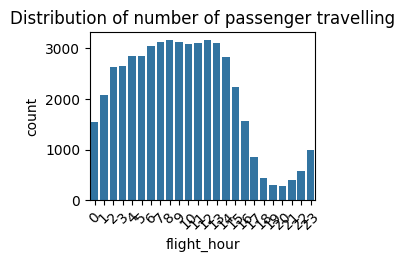

In [27]:
# Plot 3: Distribution of trip 
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='flight_hour')
plt.title('Distribution of number of passenger travelling')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

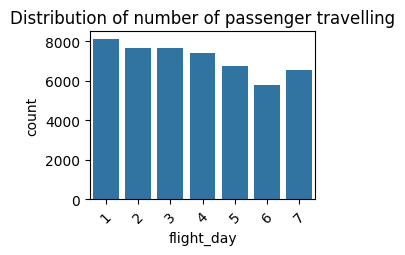

In [28]:
# Plot 3: Distribution of trip types
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='flight_day')
plt.title('Distribution of number of passenger travelling')
plt.xticks(rotation=45)

In [29]:
#remove outlieters

Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.10      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000

Feature Importance:
                  feature  importance
3           purchase_lead    0.192862
7                   route    0.151839
5             flight_hour    0.141600
4          length_of_stay    0.125556
8          booking_origin    0.107885
6              flight_day    0.091349
12        flight_duration    0.071553
0          num_passengers    0.050129
11  wants_in_flight_meals    0.022644
10   wants_preferred_seat    0.016104
9     wants_extra_baggage    0.014710
1           sales_channel    0.011989
2               trip_type    0.001781


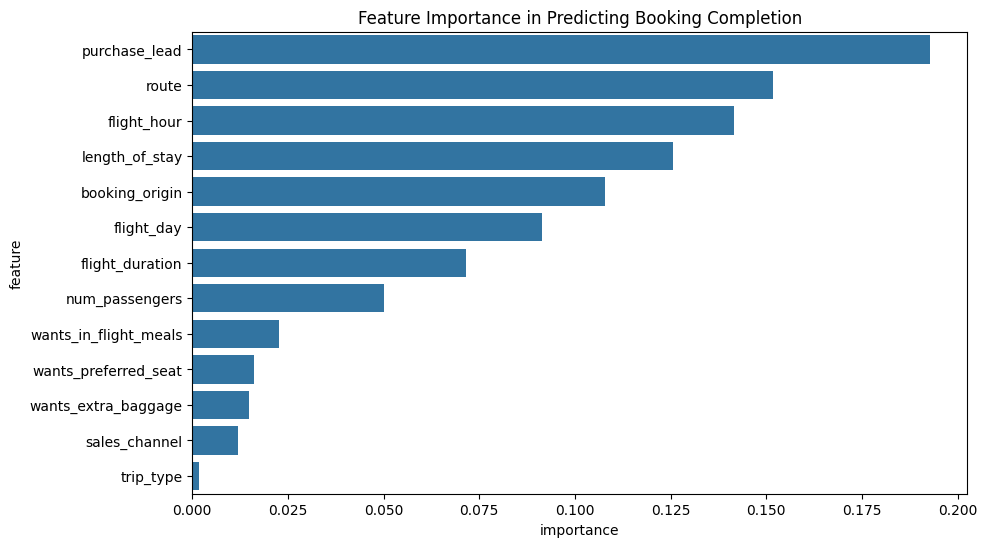

Example Prediction:
Probability of booking completion: 0.2


In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data (similar structure to customer_booking.csv)
#np.random.seed(42)
#n_samples = 1000

#df = pd.DataFrame(data)

# Preprocessing
# Separate features and target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Handle categorical variables
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print model performance
print("Model Performance:")
print("\Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\
Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Booking Completion')
plt.show()

# Example prediction function
def predict_booking_completion(sample_data):
    # Scale the sample data
    sample_scaled = scaler.transform(sample_data)
    # Make prediction
    prediction = rf_model.predict_proba(sample_scaled)
    return prediction[:, 1]  # Return probability of completion

# Example usage
sample = X_test[:1]  # Take first row as example
print("\
Example Prediction:")
print("Probability of booking completion:", predict_booking_completion(sample)[0])